### TensorFlow实现线性回归：美食评分案例

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/RUC/DeepLearning/course7
!ls

/content/gdrive/My Drive/RUC/DeepLearning/course7
data_facescore	data_foodscore	FoodScore.csv  程序


In [3]:
import pandas as pd
MasterFile=pd.read_csv('./FoodScore.csv') 
print(MasterFile.shape)
MasterFile[0:5]

(196, 2)


,ID,score
0,pic1,2.750333
1,pic2,2.962092
2,pic3,3.459351
3,pic4,2.246845
4,pic5,2.609172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86df642518>]],
      dtype=object)

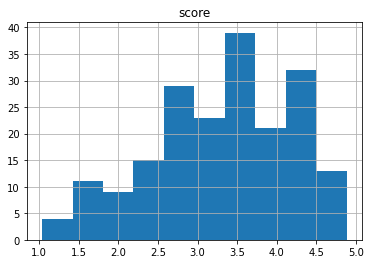

In [4]:
MasterFile.hist()

In [5]:
import numpy as np
FileNames=MasterFile['ID']
N=len(FileNames)
Y=np.array(MasterFile['score']).reshape([N,1])
#Y=(Y-np.mean(Y))/np.std(Y)

In [6]:
from PIL import Image

IMSIZE=128
X=np.zeros([N,IMSIZE,IMSIZE,3])
for i in range(N):
    MyFile=FileNames[i]
    Im=Image.open('./data_foodscore/'+MyFile+'.jpg')
    Im=Im.resize([IMSIZE,IMSIZE])
    Im=np.array(Im)/255
    X[i,]=Im

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

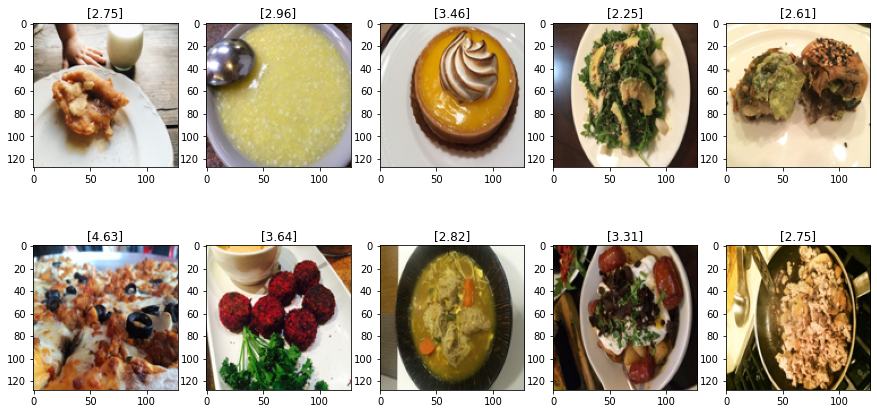

In [7]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax=plt.subplots(2,5)
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(10):
    ax[i].imshow(X[i,:,:,:])
    ax[i].set_title(np.round(Y[i],2))

In [9]:
from sklearn.model_selection import train_test_split
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.5,random_state=0)

In [10]:
from keras.layers import Dense, Flatten, Input
from keras import Model
input_layer=Input([IMSIZE,IMSIZE,3])
x=input_layer
x=Flatten()(x)
x=Dense(1)(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49153     
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.optimizers import Adam
model.compile(loss='mse',optimizer=Adam(lr=0.001),metrics=['mse'])

In [12]:
model.fit(X0,Y0,validation_data=[X1,Y1],batch_size=100,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 122ms/step - loss: 13.0014 - mse: 13.0014 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 453.5139 - mse: 453.5139 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 34.4558 - mse: 34.4558 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 99.4062 - mse: 99.4062 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 250.7042 - mse: 250.7042 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 161.3076 - mse: 161.3076 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 26.4594 - mse: 26.4594 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 8/100
1

In [13]:
MyPic=Image.open('mypic.jpg')
MyPic
MyPic=MyPic.resize((IMSIZE,IMSIZE))        
MyPic=np.array(MyPic)/255                  
MyPic=MyPic.reshape((1,IMSIZE,IMSIZE,3))   
model.predict(MyPic)  

FileNotFoundError: ignored